<a href="https://colab.research.google.com/github/DaniilAszn/Math_modeling_1_course/blob/main/Numerical_methods_for_DE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Численные методы решения ОДУ (Эйлер, модифицированный Эйлер, Рунге-Кутты)**

Дифференциальное уравнение:

$y' = \frac{xy^2 + x}{y - x^2y},$

$1,01\leq x \leq3,01, x_0 = 1,01, y_{x_0}=22$

$Решение$

$\frac{dy}{dx} = \frac{x(y^2 + 1)}{y(1-x^2)}$

$\frac{ydy}{y^2 + 1} = \frac{xdx}{1 - x^2}$

$\frac{1}{2}\int{\frac{d(y^2 + 1)}{y^2 + 1}}= \frac{1}{-2}\int{\frac{d(x^2 - 1)}{x^2 - 1}}$

$\ln(y^2 + 1) = -\ln(x^2 - 1) + C, C=const$

$\ln(y^2 + 1) + \ln(x^2 - 1) = C$

$\ln((y^2 + 1)(x^2 - 1)) = C$

$(y^2 + 1)(x^2 - 1) = e^C$

$y = \pm\sqrt{\frac{e^C}{x^2 - 1} - 1}$ (беру со знаком +)

$x_0 = 1,01, y_{x_0}=22 => e^C = 9,7485$

$y = \sqrt{\frac{9,7485}{x^2 - 1} - 1}$

# Практика 6 (Метод Эйлера)
$x_{i+1} = x_i + h,$

$y_{i+1} = y_i + hf(x_i,y_i),$

где $f_{x,y} = y' = \frac{xy^2 + x}{y - x^2y}$

### задание
1. Решить дифференциальное уравнение аналитически и численно методом Эйлера для
двух значений шага h=0.01; 0.001.
2. Провести сравнение полученных значений с аналитическим решением, определить
погрешность для каждого шага.
3. Результаты расчета вывести на экран и оформить в виде таблицы в отчете

In [83]:
import math as m
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

## **h = 0.01**

In [91]:
def error(Arr_num, Arr_ana):
    Arr_num = np.array(Arr_num)
    Arr_ana = np.array(Arr_ana)
    return round(np.sum(Arr_num - Arr_ana) ** 2 / np.sum(Arr_ana ** 2), 5)


def analitycal_solution(x):
    return round(m.sqrt(9.7485 / (x ** 2 - 1) - 1), 5)


def f(x, y):
    return (x * y ** 2 + x) / (y - x ** 2 * y)


h = 0.01
x0 = 1.01
y0 = 22

X = [x0]
Num_y = [y0]
Ana_y = [analitycal_solution(x0)]
Err = [(analitycal_solution(x0) - y0) ** 2 / analitycal_solution(x0) ** 2]

for i in np.arange(x0, 3.01, h):
    x0 = round(x0 + h, 5)
    y0 = round(y0 + h * f(x0, y0), 5)
    # print(f'x = {x0}, numeric_y = {y0}, analityc_y = {analitycal_solution(x0)}')

    X.append(x0)
    Num_y.append(y0)
    Ana_y.append(analitycal_solution(x0))
    Err.append(error(Num_y, Ana_y))

In [92]:
df = pd.DataFrame({'X' : X,
                   'Numeric_y' : Num_y,
                   'Analitycal_y' : Ana_y,
                   'Error' : Err})

print(df)

        X  Numeric_y  Analitycal_y    Error
0    1.01   22.00000      22.00000  0.00000
1    1.02   16.43407      15.50160  0.00120
2    1.03   13.64429      12.61245  0.00437
3    1.04   11.89597      10.88425  0.00884
4    1.05   10.66875       9.70089  0.01419
..    ...        ...           ...      ...
196  2.97    0.75815       0.49646  1.88241
197  2.98    0.75030       0.48688  1.89723
198  2.99    0.74246       0.47724  1.91222
199  3.00    0.73462       0.46751  1.92738
200  3.01    0.72679       0.45769  1.94273

[201 rows x 4 columns]


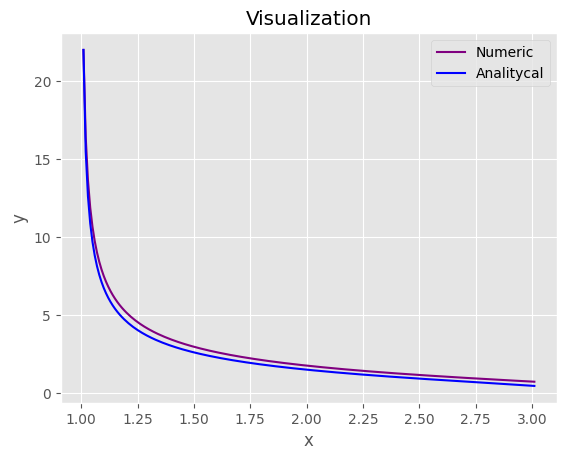

In [93]:
plt.plot(X, Num_y, color='purple', label='Numeric')
plt.plot(X, Ana_y, color='blue', label='Analitycal')
plt.title('Visualization')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

## **h = 0.001**

In [94]:
def error(Arr_num, Arr_ana):
    Arr_num = np.array(Arr_num)
    Arr_ana = np.array(Arr_ana)
    return round(np.sum(Arr_num - Arr_ana) ** 2 / np.sum(Arr_ana ** 2), 5)


def analitycal_solution(x):
    return round(m.sqrt(9.7485 / (x ** 2 - 1) - 1), 5)


def f(x, y):
    return (x * y ** 2 + x) / (y - x ** 2 * y)


h = 0.001
x0 = 1.01
y0 = 22

X = [x0]
Num_y = [y0]
Ana_y = [analitycal_solution(x0)]
Err = [(analitycal_solution(x0) - y0) ** 2 / analitycal_solution(x0) ** 2]

for i in np.arange(x0, 3.01, h):
    x0 = round(x0 + h, 5)
    y0 = round(y0 + h * f(x0, y0), 5)
    # print(f'x = {x0}, numeric_y = {y0}, analityc_y = {analitycal_solution(x0)}')

    X.append(x0)
    Num_y.append(y0)
    Ana_y.append(analitycal_solution(x0))
    Err.append(error(Num_y, Ana_y))

In [95]:
df = pd.DataFrame({'X' : X,
                   'Numeric_y' : Num_y,
                   'Analitycal_y' : Ana_y,
                   'Error' : Err})
print(df)

          X  Numeric_y  Analitycal_y    Error
0     1.010   22.00000      22.00000  0.00000
1     1.011   20.99245      20.96878  0.00000
2     1.012   20.11055      20.06900  0.00000
3     1.013   19.33015      19.27488  0.00001
4     1.014   18.63313      18.56719  0.00002
...     ...        ...           ...      ...
1996  3.006    0.49307       0.46163  0.22503
1997  3.007    0.49213       0.46064  0.22524
1998  3.008    0.49119       0.45966  0.22544
1999  3.009    0.49025       0.45867  0.22565
2000  3.010    0.48931       0.45769  0.22586

[2001 rows x 4 columns]


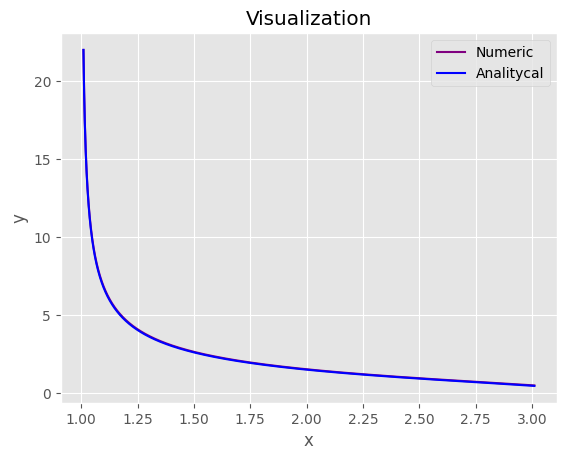

In [96]:
plt.plot(X, Num_y, color='purple', label='Numeric')
plt.plot(X, Ana_y, color='blue', label='Analitycal')
plt.title('Visualization')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Практика 7 (Модифицированный метод Эйлера)
$x_{i+1} = x_i + h,$

$y_{i+1} = y_i + \frac{h}{2}(f({x_i,y_i}) + f(x_{i+1}, y_i + hf(x_i,y_i))),$

где $f_{x,y} = y' = \frac{xy^2 + x}{y - x^2y}$

### задание
1. Решить дифференциальное уравнение аналитически и численно модифицированным методом Эйлера для
двух значений шага h=0.01; 0.001.
2. Провести сравнение полученных значений с аналитическим решением, определить
погрешность для каждого шага.
3. Результаты расчета вывести на экран и оформить в виде таблицы в отчете

In [98]:
import math as m
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

## **h = 0.01**

In [99]:
def error(Arr_num, Arr_ana):
    Arr_num = np.array(Arr_num)
    Arr_ana = np.array(Arr_ana)
    return round(np.sum(Arr_num - Arr_ana) ** 2 / np.sum(Arr_ana ** 2), 5)


def analitycal_solution(x):
    return round(m.sqrt(9.7485 / (x ** 2 - 1) - 1), 5)


def f(x, y):
    return (x * y ** 2 + x) / (y - x ** 2 * y)


h = 0.01
x0 = 1.01
y0 = 22

X = [x0]
Num_y = [y0]
Ana_y = [analitycal_solution(x0)]
Err = [(analitycal_solution(x0) - y0) ** 2 / analitycal_solution(x0) ** 2]

for i in np.arange(x0, 3.01, h):
    y0 = round(y0 + (h / 2) * (f(x0, y0) + f(round(x0 + h, 5), y0 + h * f(x0, y0))), 5)
    x0 = round(x0 + h, 5)
    # print(f'x = {x0}, numeric_y = {y0}, analityc_y = {analitycal_solution(x0)}')

    X.append(x0)
    Num_y.append(y0)
    Ana_y.append(analitycal_solution(x0))
    Err.append(error(Num_y, Ana_y))

In [100]:
df = pd.DataFrame({'X' : X,
                   'Numeric_y' : Num_y,
                   'Analitycal_y' : Ana_y,
                   'Error' : Err})
print(df)

        X  Numeric_y  Analitycal_y    Error
0    1.01   22.00000      22.00000  0.00000
1    1.02   15.07084      15.50160  0.00026
2    1.03   12.20116      12.61245  0.00080
3    1.04   10.51101      10.88425  0.00147
4    1.05    9.36040       9.70089  0.00221
..    ...        ...           ...      ...
196  2.97    0.39807       0.49646  0.18848
197  2.98    0.38693       0.48688  0.19027
198  2.99    0.37559       0.47724  0.19209
199  3.00    0.36404       0.46751  0.19396
200  3.01    0.35225       0.45769  0.19587

[201 rows x 4 columns]


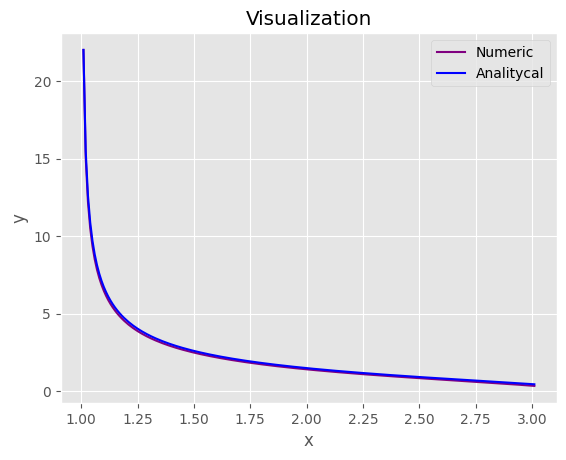

In [101]:
plt.plot(X, Num_y, color='purple', label='Numeric')
plt.plot(X, Ana_y, color='blue', label='Analitycal')
plt.title('Visualization')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

## **h = 0.001**

In [102]:
def error(Arr_num, Arr_ana):
    Arr_num = np.array(Arr_num)
    Arr_ana = np.array(Arr_ana)
    return round(np.sum(Arr_num - Arr_ana) ** 2 / np.sum(Arr_ana ** 2), 5)


def analitycal_solution(x):
    return round(m.sqrt(9.7485 / (x ** 2 - 1) - 1), 5)


def f(x, y):
    return (x * y ** 2 + x) / (y - x ** 2 * y)


h = 0.001
x0 = 1.01
y0 = 22

X = [x0]
Num_y = [y0]
Ana_y = [analitycal_solution(x0)]
Err = [(analitycal_solution(x0) - y0) ** 2 / analitycal_solution(x0) ** 2]

for i in np.arange(x0, 3.01, h):
    y0 = round(y0 + (h / 2) * (f(x0, y0) + f(round(x0 + h, 5), y0 + h * f(x0, y0))), 5)
    x0 = round(x0 + h, 5)
    # print(f'x = {x0}, numeric_y = {y0}, analityc_y = {analitycal_solution(x0)}')

    X.append(x0)
    Num_y.append(y0)
    Ana_y.append(analitycal_solution(x0))
    Err.append(error(Num_y, Ana_y))

In [103]:
df = pd.DataFrame({'X' : X,
                   'Numeric_y' : Num_y,
                   'Analitycal_y' : Ana_y,
                   'Error' : Err})
print(df)

          X  Numeric_y  Analitycal_y    Error
0     1.010   22.00000      22.00000  0.00000
1     1.011   20.96761      20.96878  0.00000
2     1.012   20.06703      20.06900  0.00000
3     1.013   19.27235      19.27488  0.00000
4     1.014   18.56427      18.56719  0.00000
...     ...        ...           ...      ...
1996  3.006    0.46095       0.46163  0.00016
1997  3.007    0.45997       0.46064  0.00016
1998  3.008    0.45898       0.45966  0.00016
1999  3.009    0.45799       0.45867  0.00016
2000  3.010    0.45700       0.45769  0.00016

[2001 rows x 4 columns]


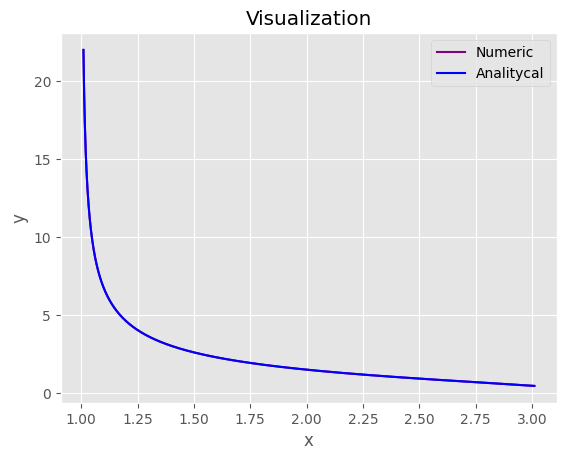

In [104]:
plt.plot(X, Num_y, color='purple', label='Numeric')
plt.plot(X, Ana_y, color='blue', label='Analitycal')
plt.title('Visualization')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Практика 8 (Метод Рунге-Кутты)
$x_{i+1} = x_i + h,$

$y_{i+1} = y_i + \frac{h}{6}(K1_i + 2K2_i + 2K3_i + K4_i),$

$K1_i = f(x_i,y_i),$

$K2_i = f(x_i + \frac{h}{2}, y_i + \frac{hK1_i}{2}),$

$K3_i = f(x_i + \frac{h}{2}, y_i + \frac{hK2_i}{2}),$

$K4_i = f(x_i + h, y_i + hK3_i),$

где $f_{x,y} = y' = \frac{xy^2 + x}{y - x^2y}$

### задание
1. Решить дифференциальное уравнение аналитически и численно модифицированным методом Рунге-Кутты для
двух значений шага h=0.01; 0.001.
2. Провести сравнение полученных значений с аналитическим решением, определить
погрешность для каждого шага.
3. Результаты расчета вывести на экран и оформить в виде таблицы в отчете

In [109]:
import math as m
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

## **h = 0.01**

In [106]:
def error(Arr_num, Arr_ana):
    Arr_num = np.array(Arr_num)
    Arr_ana = np.array(Arr_ana)
    return round(np.sum(Arr_num - Arr_ana) ** 2 / np.sum(Arr_ana ** 2), 5)


def analitycal_solution(x):
    return round(m.sqrt(9.7485 / (x ** 2 - 1) - 1), 5)


def f(x, y):
    return (x * y ** 2 + x) / (y - x ** 2 * y)


h = 0.01
x0 = 1.01
y0 = 22

X = [x0]
Num_y = [y0]
Ana_y = [analitycal_solution(x0)]
Err = [(analitycal_solution(x0) - y0) ** 2 / analitycal_solution(x0) ** 2]

for i in np.arange(x0, 3.01, h):
    K1_0 = f(x0, y0)
    K2_0 = f(x0 + h / 2, y0 + (h * K1_0) / 2)
    K3_0 = f(x0 + h / 2, y0 + (h * K2_0) / 2)
    K4_0 = f(x0 + h, y0 + h * K3_0)
    x0 = round(x0 + h, 5)
    y0 = round(y0 + (h / 6) * (K1_0 + 2 * K2_0 + 2 * K3_0 + K4_0), 5)
    # print(f'x = {x0}, numeric_y = {y0}, analityc_y = {analitycal_solution(x0)}')

    X.append(x0)
    Num_y.append(y0)
    Ana_y.append(analitycal_solution(x0))
    Err.append(error(Num_y, Ana_y))

In [107]:
df = pd.DataFrame({'X' : X,
                   'Numeric_y' : Num_y,
                   'Analitycal_y' : Ana_y,
                   'Error' : Err})
print(df)

        X  Numeric_y  Analitycal_y    Error
0    1.01   22.00000      22.00000  0.00000
1    1.02   15.49033      15.50160  0.00000
2    1.03   12.60267      12.61245  0.00000
3    1.04   10.87570      10.88425  0.00000
4    1.05    9.69323       9.70089  0.00000
..    ...        ...           ...      ...
196  2.97    0.49446       0.49646  0.00009
197  2.98    0.48487       0.48688  0.00009
198  2.99    0.47520       0.47724  0.00009
199  3.00    0.46544       0.46751  0.00009
200  3.01    0.45559       0.45769  0.00009

[201 rows x 4 columns]


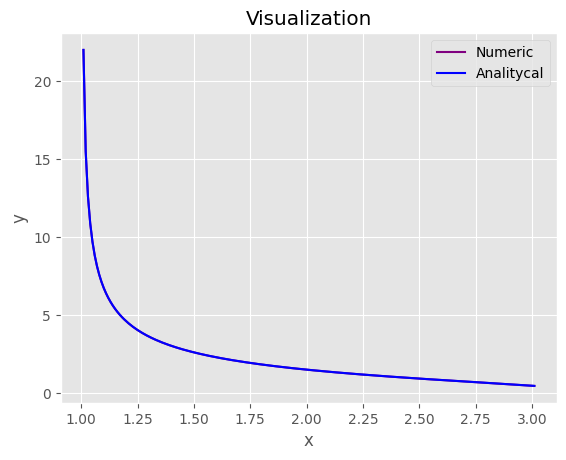

In [108]:
plt.plot(X, Num_y, color='purple', label='Numeric')
plt.plot(X, Ana_y, color='blue', label='Analitycal')
plt.title('Visualization')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

## **h = 0.001**

In [110]:
def error(Arr_num, Arr_ana):
    Arr_num = np.array(Arr_num)
    Arr_ana = np.array(Arr_ana)
    return round(np.sum(Arr_num - Arr_ana) ** 2 / np.sum(Arr_ana ** 2), 5)


def analitycal_solution(x):
    return round(m.sqrt(9.7485 / (x ** 2 - 1) - 1), 5)


def f(x, y):
    return (x * y ** 2 + x) / (y - x ** 2 * y)


h = 0.001
x0 = 1.01
y0 = 22

X = [x0]
Num_y = [y0]
Ana_y = [analitycal_solution(x0)]
Err = [(analitycal_solution(x0) - y0) ** 2 / analitycal_solution(x0) ** 2]

for i in np.arange(x0, 3.01, h):
    K1_0 = f(x0, y0)
    K2_0 = f(x0 + h / 2, y0 + (h * K1_0) / 2)
    K3_0 = f(x0 + h / 2, y0 + (h * K2_0) / 2)
    K4_0 = f(x0 + h, y0 + h * K3_0)
    x0 = round(x0 + h, 5)
    y0 = round(y0 + (h / 6) * (K1_0 + 2 * K2_0 + 2 * K3_0 + K4_0), 5)
    # print(f'x = {x0}, numeric_y = {y0}, analityc_y = {analitycal_solution(x0)}')

    X.append(x0)
    Num_y.append(y0)
    Ana_y.append(analitycal_solution(x0))
    Err.append(error(Num_y, Ana_y))

In [111]:
df = pd.DataFrame({'X' : X,
                   'Numeric_y' : Num_y,
                   'Analitycal_y' : Ana_y,
                   'Error' : Err})
print(df)

          X  Numeric_y  Analitycal_y  Error
0     1.010   22.00000      22.00000    0.0
1     1.011   20.96878      20.96878    0.0
2     1.012   20.06900      20.06900    0.0
3     1.013   19.27487      19.27488    0.0
4     1.014   18.56718      18.56719    0.0
...     ...        ...           ...    ...
1996  3.006    0.46190       0.46163    0.0
1997  3.007    0.46092       0.46064    0.0
1998  3.008    0.45994       0.45966    0.0
1999  3.009    0.45895       0.45867    0.0
2000  3.010    0.45796       0.45769    0.0

[2001 rows x 4 columns]


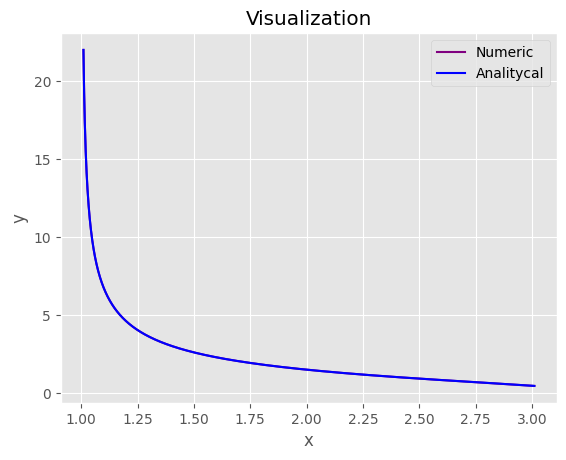

In [112]:
plt.plot(X, Num_y, color='purple', label='Numeric')
plt.plot(X, Ana_y, color='blue', label='Analitycal')
plt.title('Visualization')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()